## 회귀



In [1]:
import os
from os.path import join
import copy
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import sklearn

import matplotlib.pyplot as plt

SEED = 42

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
#보스톤 데이터셋은 범죄율, 강의 인접 유무, 세금 등 13개의 변수를 가지고 있으며, 주택 가격을 라벨 데이터로 가지고 있습니다

### <특징 데이터>
CRIM: 범죄율<br>
INDUS: 비소매상업지역 면적 비율<br>
NOX: 일산화질소 농도<br>
RM: 주택당 방 수<br>
LSTAT: 인구 중 하위 계층 비율<br>
B: 인구 중 흑인 비율<br>
PTRATIO: 학생/교사 비율<br>
ZN: 25,000 평방피트를 초과 거주지역 비율<br>
CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0<br>
AGE: 1940년 이전에 건축된 주택의 비율<br>
RAD: 방사형 고속도로까지의 거리<br>
DIS: 직업센터의 거리<br>
TAX: 재산세율<br>

In [3]:
data = boston.data
label = boston.target
columns = boston.feature_names

In [4]:
data = pd.DataFrame(data, columns = columns)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
from sklearn.model_selection import train_test_split

#변수를 split 해주세요
X_train, X_test,y_train,y_test = train_test_split(data, label, test_size = 0.2, random_state= SEED)

### DecisionTreeRegressor와 DecisionTreeClassifier를 쓰는 상황을 구분하여 작성 해주세요

- DecisionTreeRegressor : target 변수가 연속형 변수
- DecisionTreeClassifier : target 변수가 범주형 변수

### Decision Tree Regressor


#### 1) x 변수로 'RM' 변수를, y 변수는 주택 가격으로 하여 회귀트리모델을 돌려주세요.<br>

In [6]:
#1) 트리의 max_depth는 5로 지정해주세요
from sklearn.tree import DecisionTreeRegressor

dt_regr = DecisionTreeRegressor(max_depth=5, random_state=SEED) 
dt_regr.fit(X_train[['RM']], y_train)
y_pred = dt_regr.predict(X_test[['RM']])

#### 2) R<sup>2</sup> 으로 회귀 모델이 데이터를 잘 표현하는지 확인해주세요.
(R<sup>2</sup>값이 1에 가까울수록 회귀 모델이 데이터를 잘 표현한다는 것을 의미합니다.)

In [8]:
from sklearn.metrics import r2_score
print('단순 결정 트리 회귀, R2 :', round(r2_score(y_test,y_pred),4))

단순 결정 트리 회귀, R2 : 0.4145


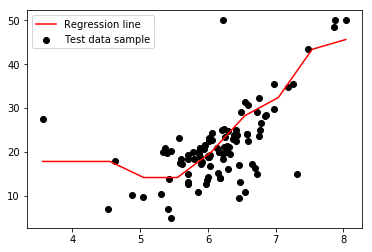

In [9]:
line_x = np.linspace(np.min(X_test['RM']), np.max(X_test['RM']), 10)
line_y = dt_regr.predict(line_x.reshape((-1, 1)))

plt.scatter(X_test['RM'].values.reshape((-1, 1)), y_test, c = 'black')
plt.plot(line_x, line_y, c = 'red')
plt.legend(['Regression line', 'Test data sample'], loc='upper left')

#### 변수 하나로는 R<sup>2</sup>값이 높지 않은 것을 확인하였습니다.
#### 3) 13개의 변수를 모두 사용해 결정 트리 회귀 모델을 사용해 보세요. 

In [10]:
#파라미터 조정 자유입니다.
dtr_regr = DecisionTreeRegressor(max_depth=8, random_state=SEED)
dtr_regr.fit(X_train, y_train)
pred = dtr_regr.predict(X_test)
print('다중 결정 트리 회귀, R2 : ',round(r2_score(y_test, pred),4))

다중 결정 트리 회귀, R2 :  0.8776


# 분류

In [11]:
import os
from os.path import join
import copy
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import sklearn

import matplotlib.pyplot as plt

adult_path = join('adult_data.csv')
column_path = join('adult_names.txt')

adult_columns = list()
for l in open(column_path):
    adult_columns = l.split()

In [12]:
data = pd.read_csv(adult_path, names = adult_columns)
data['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [13]:
label = data['income']
del data['income']
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [14]:
columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [15]:
data.shape

(48842, 14)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [17]:
# Pandas get_dummies 함수를 사용해 범주형 변수를 One-Hot Encoding하고, 라벨 데이터를 0,1 로 변경
data = pd.get_dummies(data)
label = label.map(lambda x : 0 if x =='>50K' else 1)

## Cross Validation

In [18]:
from sklearn.model_selection import train_test_split

# (Train, Valid), Test 분할
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=SEED)

In [20]:
# Train, Valid 분할
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=SEED)

In [21]:
#랜덤 포레스트로 모델을 학습시켜 주세요.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(random_state=SEED)
rf.fit(X_train, y_train)

# Valid 데이터로 검증
y_pred_val = rf.predict(X_val)
print('랜덤 포레스트 검증 데이터 정확도 : {0:.2f}%'.format(accuracy_score(y_val,y_pred_val)*100))

# Test 데이터로 모델 평가
y_pred_test = rf.predict(X_test)
print('랜덤 포레스트 테스트 데이터 정확도 : {0:.2f}%'.format(accuracy_score(y_test,y_pred_test)*100))

랜덤 포레스트 검증 데이터 정확도 : 85.04%
랜덤 포레스트 테스트 데이터 정확도 : 84.97%


## Parameter Tuning
간단히 GridSearchCV 함수를 사용해 랜덤 포레스트의 n_estimator, max_depth 파라미터 중 가장 좋은 파라미터 조합을 찾아보겠습니다.<br>
GridSearchCV 함수는 Sklearn의 model_selection 패키지에 있습니다.<br>

In [22]:
from sklearn.model_selection import GridSearchCV


params = {
    'n_estimators':[100], 
    #n_estimators를 여러개로 주면 너무 느려서 한개로 했습니다. 여러개로 돌려보시고 더 높은 성능이 나오면 그것으로 해도 무방합니다
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}

#위의 리스트 값말고 다른값들로 돌려보았을 때 괜찮은 값 있으면 변경하셔도 됩니다.

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf = RandomForestClassifier(random_state=SEED)
grid = GridSearchCV(rf, param_grid=params,cv=3)
grid.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [23]:
print('최적 하이퍼 파라미터:\n', grid.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 100}
최고 예측 정확도: 0.8592


In [24]:
from sklearn.model_selection import cross_val_score

# 위에서 나온 최적 하이퍼 파라미터로 모델을 학습시켜 주세요.
rf_best = RandomForestClassifier(n_estimators=100, max_depth=12, min_samples_leaf=8, min_samples_split=20, random_state=SEED)
rf_best.fit(X_train, y_train)
pred = rf_best.predict(X_test)

print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.8551


Text(0.5, 1.0, 'Feature importance Top 20')

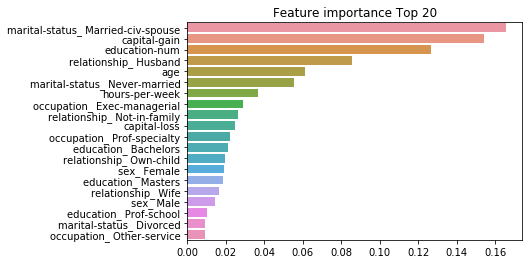

In [25]:
# 개별 feature들의 중요도를 시각화해주세요.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
feature = rf_best.feature_importances_
feature = pd.Series(feature, index = X_train.columns)
feature = feature.sort_values(ascending=False)
sns.barplot(feature[:20], feature[:20].index).set_title('Feature importance Top 20')

## Voting Ensemble

#### 1) 모델 불러오기 및 정의하기

In [26]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier 
from lightgbm import LGBMClassifier 
#from tpot import TPOTClassifier # TPOT

#원하는 모델 3개를 골라 VotingClassifier을 돌려주세요.
#저는 성능 상관없이 모델을 가져왔는데 부담없이 원하시는 모델을 돌려주시면 됩니다ㅎㅎ

rf = RandomForestClassifier(n_estimators=100, max_depth=12, min_samples_leaf=8, min_samples_split=8, random_state=SEED)
xgb = XGBClassifier() 
lgbm = LGBMClassifier()

vt = VotingClassifier(estimators=[('xgb', xgb), ('rf', rf), ('lgbm', lgbm)], voting='soft')
vt.fit(X_train,y_train)
y_pred = vt.predict(X_val)

scores_K3 = cross_val_score(vt,X_train,y_train,cv=3)

In [27]:
print("Cross Validation Acc : {:.2f}%".format(scores_K3.mean()*100))
print("Voting Ensemble Acc : {:.2f}%".format(accuracy_score(y_val,y_pred)*100))

Cross Validation Acc : 87.28%
Voting Ensemble Acc : 86.81%


# 수고하셨습니다:)